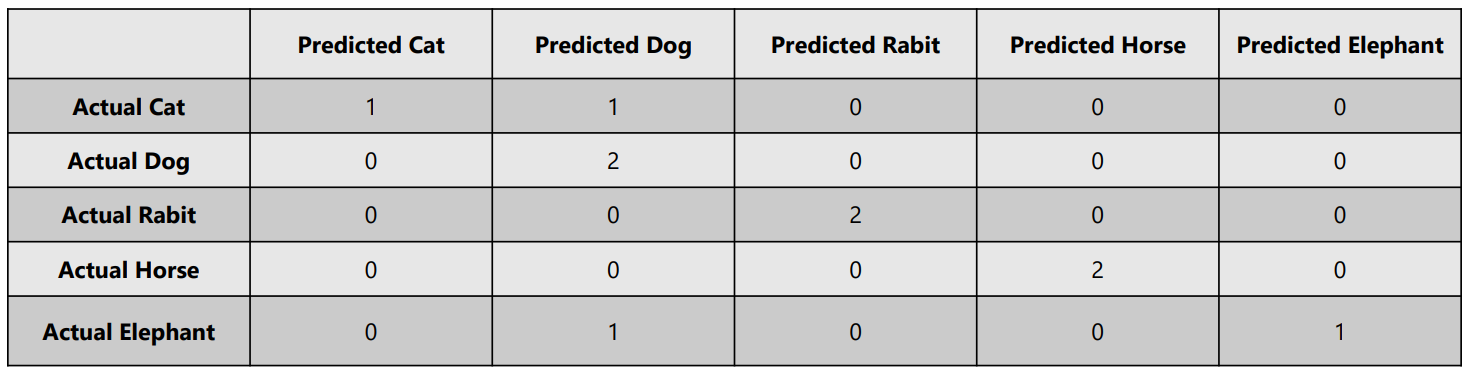

Manually compute solution:
1. Compute overall accuracy.
2. Per-class metrics (Cat, Dog, Rabbit, Horse, Elephant): Precision, Recall, F1 Score
> Now use sklearn and compare the results

In [13]:
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)

In [14]:
# Confusion matrix as arrays
y_true = np.array(
    [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
)  # Cat=0, Dog=1, Rabbit=2, Horse=3, Elephant=4
y_pred = np.array([0, 1, 1, 1, 2, 2, 3, 3, 1, 4])

# Overall accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

# Get confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3, 4])

# Calculate TP, FP, FN, TN for each class
classes = ["Cat", "Dog", "Rabbit", "Horse", "Elephant"]
n_samples = len(y_true)

print(
    f"{'Class':<10} {'TP':<4} {'FP':<4} {'FN':<4} {'TN':<4} {'Precision':<10} {'Recall':<10} {'F1':<10}"
)
print("-" * 70)

for i, cls in enumerate(classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = n_samples - TP - FP - FN

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = (
        2 * (precision * recall) / (precision + recall)
        if (precision + recall) > 0
        else 0
    )

    print(
        f"{cls:<10} {TP:<4} {FP:<4} {FN:<4} {TN:<4} {precision:<10.2f} {recall:<10.2f} {f1:<10.2f}"
    )

Accuracy: 0.80

Class      TP   FP   FN   TN   Precision  Recall     F1        
----------------------------------------------------------------------
Cat        1    0    1    8    1.00       0.50       0.67      
Dog        2    2    0    6    0.50       1.00       0.67      
Rabbit     2    0    0    8    1.00       1.00       1.00      
Horse      2    0    0    8    1.00       1.00       1.00      
Elephant   1    0    1    8    1.00       0.50       0.67      


In [15]:
# Verify with sklearn built-in
print("\n" + "=" * 70)
print("sklearn classification_report verification:")
print("=" * 70)
print(classification_report(y_true, y_pred, target_names=classes))


sklearn classification_report verification:
              precision    recall  f1-score   support

         Cat       1.00      0.50      0.67         2
         Dog       0.50      1.00      0.67         2
      Rabbit       1.00      1.00      1.00         2
       Horse       1.00      1.00      1.00         2
    Elephant       1.00      0.50      0.67         2

    accuracy                           0.80        10
   macro avg       0.90      0.80      0.80        10
weighted avg       0.90      0.80      0.80        10

